<a href="https://colab.research.google.com/github/renzo1836/ProyectoDataScience1/blob/main/PROYECTO_FINAL_VALDEZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRE ENTREGA - PROYECTO FINAL**

**DATA SCIENCE**


Nombre y apellido: Renzo Valdez Aquino


***Abstract***: *El presente trabajo pretende analizar una base de datos que reúne las respuestas de una encuesta elaborada por LAPOP (instituto de investigación de la Vanderbilt University) para conformar el Barómetro de las Américas 2023 (informe que se realiza con los datos relevados en los países de la región y que busca estudiar los valores democráticos en las Américas). La encuesta que analizaremos será la realizada en Perú en el año 2023. No analizaremos todas las preguntas, sino que hicimos una selección de quince preguntas vinculdas a la confianza en instituciones y la democracia como forma de gobierno. Tampoco analizaremos a toda la muestra, sino a una porción de ella: los jóvenes*


En este punto es necesario aclarar que las respuestas a las preguntas están codificadas. El manual de códigos puede ser revisado en la carpeta Drive en el que se ubica este informe.




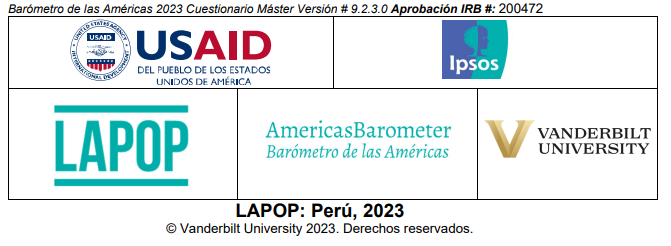

Preguntas:
1. Cómo se da la relación entre el género y el respeto a las instituciones
2. Cómo se da la relación entre el género y el interés en la política en los encuestados.

Hipótesis:
1. Las personas, tanto de género masculino como femenino, en un rango etario de 18 a 29 años tienen niveles parecidos de confianza en las instituciones
2. En un rango etario de 18 a 29 años, no se perciben diferencias relevantes en el interés por la política según el género.


In [228]:
pip install pyspssio #El archivo con el que contamos, es un archivo .sav de SPSS, por lo cual instalamos lo siguiente


In [229]:
#Importamos la siguiente biblioteca para leer y escribir archivos SPSS (.sav y .zsav)
import pyspssio

In [230]:
import matplotlib as mpl  # Importa la biblioteca Matplotlib con el alias "mpl".
import matplotlib.pyplot as plt  # Importa el submódulo pyplot de Matplotlib con el alias "plt".
#import seaborn as sns  # Importa la biblioteca Seaborn.
import pandas as pd  # Importa la biblioteca Pandas con el alias "pd"
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy import stats                    # Importa stats desde scipy para análisis estadístico
import numpy as np                         # Importa numpy para operaciones numéricas
import statsmodels.formula.api as sm       # Importa statsmodels para modelado estadístico
import os                                  # Importa os para funcionalidades del sistema operativo
import statsmodels.formula.api as smf

# Configuración de Bokeh
from bokeh.resources import INLINE         # Importa INLINE desde bokeh.resources para renderizado de Bokeh
import bokeh.io                            # Importa bokeh.io para interactividad con Bokeh

# Configuración de recursos Bokeh
bokeh.io.output_notebook(INLINE)           # Habilita la salida de Bokeh en el notebook

In [231]:
#Leemos el archivo con la encuesta (ya guardada en Drive) con el siguiente código. Con 'df' visualizamos el dataset completo, que tiene un total de 1535 filas por 197 columnas.
#Cada columna es una pregunta de la encuesta
df, meta = pyspssio.read_sav('/content/drive/MyDrive/CSVs Coder/PER_2023_LAPOP_AmericasBarometer_v1.0_w.sav')
df #llamamos la dataframe para corroborar que se cargó todo. Vemos que son 197 columas (cada una es una pregunta) y 1535 registros

,idnum,pais,nationality,estratopri,estratosec,strata,prov,municipio,perprov,upm,...,psc13n_13,psc13n_77,colorr,noise1,conocim,sexin,colori,formatq,idiomaq,fecha
0,2277.0,11.0,11.0,1103.0,1.0,1103.0,1115.0,11150101.0,111501.0,80.0,...,0.0,0.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,10apr2023
1,9874.0,11.0,11.0,1103.0,1.0,1103.0,1115.0,11150112.0,111501.0,26.0,...,0.0,0.0,3.0,2.0,3.0,1.0,3.0,4.0,1.0,20mar2023
2,2387.0,11.0,11.0,1103.0,1.0,1103.0,1115.0,11150112.0,111501.0,26.0,...,0.0,0.0,4.0,0.0,2.0,1.0,3.0,4.0,1.0,20mar2023
3,2585.0,11.0,11.0,1103.0,1.0,1103.0,1115.0,11150112.0,111501.0,26.0,...,0.0,0.0,4.0,2.0,4.0,1.0,3.0,4.0,1.0,30mar2023
4,3828.0,11.0,11.0,1103.0,1.0,1103.0,1115.0,11150101.0,111501.0,80.0,...,0.0,0.0,4.0,0.0,1.0,1.0,3.0,4.0,1.0,15apr2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,8576.0,11.0,11.0,1105.0,3.0,1105.0,1112.0,11120125.0,111201.0,13.0,...,0.0,0.0,5.0,2.0,2.0,2.0,3.0,4.0,1.0,14apr2023
1531,499.0,11.0,11.0,1105.0,3.0,1105.0,1112.0,11120125.0,111201.0,13.0,...,0.0,0.0,4.0,0.0,2.0,2.0,3.0,4.0,1.0,19mar2023
1532,9144.0,11.0,11.0,1105.0,3.0,1105.0,1112.0,11120125.0,111201.0,13.0,...,0.0,0.0,4.0,1.0,3.0,2.0,3.0,4.0,1.0,16apr2023
1533,8217.0,11.0,11.0,1105.0,3.0,1105.0,1112.0,11120125.0,111201.0,13.0,...,0.0,0.0,5.0,0.0,3.0,2.0,3.0,4.0,1.0,12apr2023


In [232]:
#Hacemos el siguiente código para seleccionar las columnas de nuestro interés
s_df = df [['q2','q1tc_r','b2','b13','b21','b21a', 'pol1','vb10','l1n','soct2','dem30','pn4','lib2c','ocup4a','b4']]
s_df.head()

,q2,q1tc_r,b2,b13,b21,b21a,pol1,vb10,l1n,soct2,dem30,pn4,lib2c,ocup4a,b4
0,47.0,2.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0,3.0,2.0,3.0,1.0,3.0,1.0
1,26.0,2.0,2.0,3.0,3.0,4.0,2.0,2.0,5.0,3.0,2.0,3.0,2.0,2.0,3.0
2,55.0,2.0,6.0,1.0,1.0,5.0,4.0,2.0,8.0,3.0,1.0,4.0,2.0,6.0,7.0
3,44.0,2.0,5.0,3.0,3.0,3.0,2.0,2.0,5.0,3.0,1.0,2.0,1.0,1.0,4.0
4,68.0,1.0,6.0,5.0,5.0,3.0,1.0,1.0,9.0,2.0,1.0,3.0,2.0,6.0,6.0


✅✋🏽 En este punto, es necesario aclarar cómo vamos a renombrar las columnas que hemos seleccionado. Debemos tener presente que cada columna representa un pregunta de nuestra encuesta, por lo que aclararemos de qué pregunta estamos hablando 📢

* 🎂  q2: ¿Cuál es su edad en años cumplidos? ➡️ **Edad**
* ♀ 🏳️‍🌈 ♂ q1tc_r: Para fines estadísticos, por favor, ¿me   podría confirmar su género? ➡️ **Género**
* 🏛️ b2: ¿Hasta qué punto tiene usted respeto por las instituciones políticas de Perú? ➡️ **P1**
* 📚 b13: ¿Hasta qué punto tiene usted confianza en el Congreso? ➡️ **P2**
* 🤝 b21: ¿Hasta qué punto tiene usted confianza en los partidos políticos? ➡️ **P3**
* 🙋🏽‍♀️ b21a: ¿Hasta qué punto tiene usted confianza en la presidenta? ➡️ **P4**
* 🧐 pol1: ¿Qué tanto interés tiene usted en la política: mucho, algo, poco o nada? ➡️ **P5**
* 🫂'vb10': ¿En este momento, simpatiza con algún partido político? ➡️ **P6**
* 🫀 'l1n': Cambiando de tema, en esta tarjeta tenemos una **escala** del 1 a 10 que va de **izquierda a derecha**, en la que el 1 significa izquierda y el 10 significa derecha. Según el sentido que tengan para usted los términos "izquierda" y "derecha" cuando piensa sobre su punto de vista político, ¿dónde se encontraría usted en esta escala? Dígame el número. ➡️ **P7**
* 👁️ 'soct2': ¿Considera usted que la **situación** económica del **país** es mejor, igual o peor que hace doce meses? ➡️ **P8**
* 🗳️ 'dem30': ¿En su opinión, **Perú** es una **democracia**? ➡️ **P9**
* 💯 pn4: En general, ¿usted diría que está muy satisfecho(a), satisfecho(a), insatisfecho(a) o muy insatisfecho(a) con la forma en que la democracia en Perú? ➡️ **P10**
* 🗣️'lib2c': Usted cree que ahora en el país tenemos muy poca, suficiente o demasiada libertad para expresar las opiniones políticas sin miedo ➡️ **P11**
* 🛠️'ocup4a': **¿A qué se dedica usted principalmente?** ¿Está usted actualmente... : ➡️ **P12**
* 💓'b4': ¿Hasta qué punto se siente usted **orgulloso** de vivir bajo el **sistema político** peruano? ➡️ **P13**

In [233]:
#Renombramos las columnas
s_df = s_df.rename(columns={
    'q2': 'Edad',
    'q1tc_r': 'Genero',
    'b2': 'P1',
    'b13':'P2',
    'b21':'P3',
    'b21a':'P4',
    'pol1':'P5',
    'vb10':'P6',
    'l1n':'P7',
    'soct2':'P8',
    'dem30':'P9',
    'pn4':'P10',
    'lib2c':'P11',
    'ocup4a':'P12',
    'b4':'P13',
})

s_df.head()

,Edad,Genero,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13
0,47.0,2.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0,3.0,2.0,3.0,1.0,3.0,1.0
1,26.0,2.0,2.0,3.0,3.0,4.0,2.0,2.0,5.0,3.0,2.0,3.0,2.0,2.0,3.0
2,55.0,2.0,6.0,1.0,1.0,5.0,4.0,2.0,8.0,3.0,1.0,4.0,2.0,6.0,7.0
3,44.0,2.0,5.0,3.0,3.0,3.0,2.0,2.0,5.0,3.0,1.0,2.0,1.0,1.0,4.0
4,68.0,1.0,6.0,5.0,5.0,3.0,1.0,1.0,9.0,2.0,1.0,3.0,2.0,6.0,6.0


<Axes: >

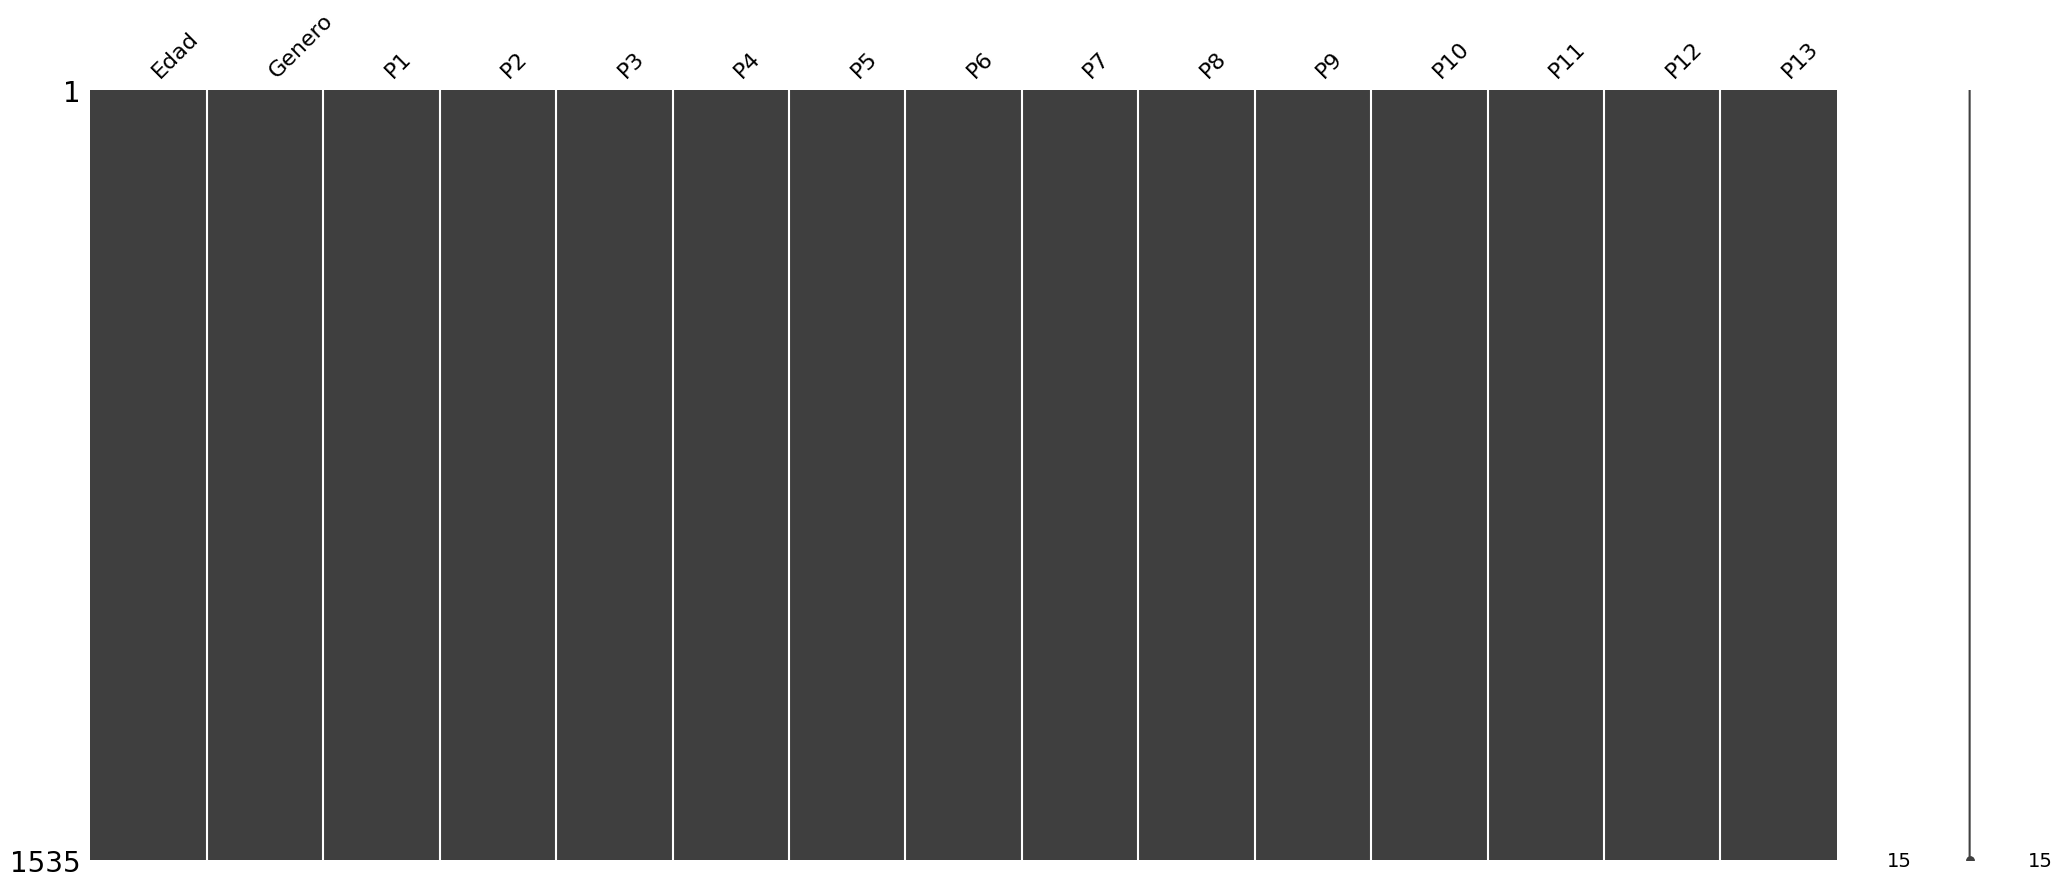

In [234]:
#Generamos el siguiente código para comprobar que todos los datos están completos y no hay valores ni filas vacías

import missingno as msno
%matplotlib inline
msno.matrix(s_df)

✅🙋🏽‍♀️ Tal como podemos observar, nuestra encuesta **no tiene valores nulos**. Sin embargo, sabemos que pueden existir las típicas respuestas de "**No sabe**" ❓ o "**No responde**" ❌. Según el Cuestionario que tenemos disponible, estas categorías de respuesta fueron codificadas de la siguiente manera 🤓:

* ❓ 888888: No sabe
* ❌ 988888: No responde

❗Por lo general, estas **respuestas** suelen ser **marginales**, es decir, son tan pocas que no tomarlas en cuenta no implicarían un cambio considerable. Esto no significa que, teóricamente, no tengan un significado.
Por tal razón, para los fines de este análisis, **hemos decidido imputarlas eliminándolas del modelo** ⛔. Para ellos, **convertiremos** los valores '888888' y '988888' de cada columna (pregunta) **en valores nulos**. Posteriormente utilizaremos el comando ***.dropna*** para quitarlas del modelo ✒️.

In [235]:
#Transformamos los "No sabe" (888888) y los "No responde" (988888) en valores Nulos, para después eliminarlos

s_df['P1'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P2'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P3'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P4'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P5'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P6'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P7'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P8'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P9'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P10'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P11'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P12'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['P13'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['Genero'].replace({888888.0: None, 988888.0: None}, inplace=True)
s_df['Edad'].replace({888888.0: None, 988888.0: None}, inplace=True)


In [236]:
# Eliminar filas con valores NaN

s_df.dropna(inplace=True)
# Anteriormente, teníamos 1535 filas. Después de este comando, pasaremos a tener 1414; es decir, fueron eliminadas 121 filas, lo que representó el 7.8% de las filas originales.
s_df.shape

(1414, 15)

✅✋🏽 Ahora, aclaremos algunas cosas respecto a las respuestas a las preguntas. Estas respuestas son, en realidad, nuestros valores:

🗣️ Algunas preguntas están planteadas para que el encuestado se ubique en una escala del 1 al 7, o del 1 al 10 👀; otras son dicotómicas (Sí o No) ✌️; y otras tienen respuestas concretas (como 'Mucho' o 'Poco') 😬. Para estos últimos casos, y para evitar colocar esas respuestas concretas (palabras o frases), se optó por la codificación de esas respuestas. La codificación se hizo mediante números.

🤗 Hemos decicido no transformar los códigos de estas respuestas de antemano porque para nuestro modelo de clusterización es necesario que tengamos valores numéricos. Por tal razón, cada vez que hagamos un gráfico o una tabla, haremos la correspondiente transformación de valores 😉.

🗣️ Pero lo sí haremos será un cambio en los códigos con fines de simplificar las categorías de respuesta. Veamos cómo lo haremos:

* 👉 La escala del 1 al 7 de las preguntas P1, P2, P3 y P4, de grado de confianza y respeto en instituciones, serán modificadas para tener solo tres códigos. Los códigos 1, 2 y 3 de la escala original serán reemplazados por un (nuevo) código, el 1, y significará "Baja confianza" o "Nada de respeto" según corresponda. Los códigos 4 y 5 de la escala original serán reemplazados por un (nuevo) código, el 2, y significará "Confianza media" o "Algo de respeto" según corresponda. Y los códigos 6 y 7 de la escala orginal serán reemplazados por el código 3, y significará "Alta confianza" o "Mucho respeto" según corresponda 🤓.

* 👉 La pregunta P7, de autoubicación ideológica, sufrirá un cambio parecido y solo tendrá cinco códigos. Los códigos 1 y 2 de la escala original serán reemplazados por el código 1 y significará "Izquierda". Los códigos 3 y 4 serán reemplazados por el código 2 y significará "Centro-izquierda". Los códigos 5 y 6 serán reemplazados por el código 3 y significará "Centro". Los códigos 7 y 8 serán reemplazados por el código 4 y significará "Centro-derecha". Los códigos 9 y 10 serán reemplazados por el código 5 y significará "Derecha" 👀.

* 👉 La pregunta P19 también será modificada y pasará a tener solo tres códigos. Los códigos 1, 2 y 3 de la escala original serán reemplazados por el código 1 y significará "Nada orgulloso". Los códigos 4 y 5 de la escala original serán reemplazados por el código 2 y significará "Medianamente orgulloso". Y los códigos 6 y 7 de la escala original serán reemplazados por el código 1 y significará "Muy orgulloso" 💓.

* 👉 Finalmente, y con solo con el objetivo de reducir categorías, las edades serán presentadas por grupos etarios. Los grupos planteados serán los siguientes:
  * 18 - 29 años
  * 30 - 45 años
  * 46 - 65 años
  * 66 - 85 años (nuestra muestra solo tiene casos hasta los 85 años de edad, por eso no planteamos la categoría residual "86 años o más") 🧒🏽.


Teniendo esto, hagamos las modificaciones 🛠️:

In [237]:
#Transformamos códigos

s_df['P1'].replace({1:1,2:1,3:1,4:2,5:2,6:3,7:3}, inplace=True)
s_df['P2'].replace({1:1,2:1,3:1,4:2,5:2,6:3,7:3}, inplace=True)
s_df['P3'].replace({1:1,2:1,3:1,4:2,5:2,6:3,7:3}, inplace=True)
s_df['P4'].replace({1:1,2:1,3:1,4:2,5:2,6:3,7:3}, inplace=True)
s_df['P7'].replace({1:1,2:1,3:2,4:2,5:3,6:3,7:4,8:4,9:5,10:5}, inplace=True)
s_df['P13'].replace({1:1,2:1,3:1,4:2,5:2,6:3,7:3}, inplace=True)
s_df['Edad'].replace({18:'18-29', 19:'18-29', 20:'18-29', 21:'18-29', 22:'18-29', 23:'18-29', 24:'18-29', 25:'18-29', 26:'18-29', 27:'18-29', 28:'18-29', 29:'18-29', 30:'30-45', 31:'30-45', 32:'30-45', 33:'30-45', 34:'30-45', 35:'30-45', 36:'30-45', 37:'30-45',38:'30-45',39:'30-45',40:'30-45',41:'30-45',42:'30-45', 43:'30-45',44:'30-45',45:'30-45',46:'46-65',47:'46-65',48:'46-65',49:'46-65',50:'46-65',51:'46-65',52:'46-65',53:'46-65',54:'46-65',55:'46-65',56:'46-65', 57:'46-65',58:'46-65',59:'46-65',60:'46-65', 61:'46-65', 62:'46-65', 63:'46-65', 64:'46-65', 65:'46-65', 66:'66-85', 67:'66-85', 68:'66-85', 69:'66-85',70:'66-85', 71:'66-85',72:'66-85',73:'66-85', 74:'66-85',75:'66-85',76:'66-85',77:'66-85',78:'66-85',79:'66-85',80:'66-85',81:'66-85',82:'66-85',83:'66-85',84:'66-85', 85: '66-85'}, inplace=True)

s_df.head()

#1101:1, 1102:2, 1103:3, 1104:4, 1105:5, 1106:6, 1107:7, 1108:8, 1109:9, 1110:10, 1111:11, 1112:12, 1113:13, 1114:14, 1115:15,

,Edad,Genero,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13
0,46-65,2.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0,3.0,2.0,3.0,1.0,3.0,1.0
1,18-29,2.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,1.0
2,46-65,2.0,3.0,1.0,1.0,2.0,4.0,2.0,4.0,3.0,1.0,4.0,2.0,6.0,3.0
3,30-45,2.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0
4,66-85,1.0,3.0,2.0,2.0,1.0,1.0,1.0,5.0,2.0,1.0,3.0,2.0,6.0,3.0


In [238]:
# Por último, y para que el conteo sea más práctico, estableceremos una columna índice
#Con el siguiente código, si bien es cierto, agregamos una columna ínidce, esta se encuetra pegada al dataframe original que tenía 1535 filas
data = s_df.reset_index()
data = data.drop ('index', axis = 1) #Eliminamos la columna índice pegada al dataframe original

datos = data.reset_index() #Generamos un nuevo índice y veremos que el último valor tiene el código 1319 y no 1534 como en el original

datos = datos.rename(columns={'index': 'Indice'}) #renombramos el nombre de la columna

datos.head()  #nótese que hemos cambiado el nombre de nuestro Dataframe. Ahora se llama 'datos'

,Indice,Edad,Genero,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13
0,0,46-65,2.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0,3.0,2.0,3.0,1.0,3.0,1.0
1,1,18-29,2.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,1.0
2,2,46-65,2.0,3.0,1.0,1.0,2.0,4.0,2.0,4.0,3.0,1.0,4.0,2.0,6.0,3.0
3,3,30-45,2.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0
4,4,66-85,1.0,3.0,2.0,2.0,1.0,1.0,1.0,5.0,2.0,1.0,3.0,2.0,6.0,3.0


# Edades y Género 👨👩‍🦱

🔍✅ Con todo esto listo, ya podemos comenzar a analizar nuestros datos.

Antes de empezar con lo que pretendemos: analizar el grupo de jóvenes, veamos la distribución de nuestra muestra total por edad 👩‍👩‍👧‍👦.

In [239]:
# Ahora armamos un tabla que nos servirá para visualizar nuestro primer gráfico

datos_edad = datos[['Edad','Indice']].groupby(by=['Edad']).count().reset_index()
Porcentaje = datos_edad.Indice * 100/1414
Porcentaje = Porcentaje.round(2)
datos_edad['Porcentaje'] = Porcentaje

#Hacemos algo parecido, pero con el género
datos_genero = datos[['Genero','Indice']].groupby(by=['Genero']).count().reset_index()
datos_genero['Genero'].replace({1: 'Hombre', 2: 'Mujer'}, inplace=True) #renombramos los códigos por el valor que le corresponde
Porcentaje_g = datos_genero.Indice * 100/1320
Porcentaje_g = Porcentaje_g.round(2)
datos_genero['Porcentaje'] = Porcentaje_g


In [240]:
from bokeh.palettes import Spectral6 # Importamos la paleta de colores Spectral6 de Bokeh
from bokeh.palettes import Blues8  # Importamos la paleta de colores Blues8 de Bokeh
from bokeh.models import HoverTool  # Importamos la herramienta HoverTool de Bokeh
from bokeh.io import show, output_notebook  # Importamos funciones de Bokeh para visualización interactiva
from bokeh.embed import file_html  # Importamos la función file_html de Bokeh para exportar el gráfico a HTML
from bokeh.models import CategoricalColorMapper, ColumnDataSource, FactorRange  # Importamos clases y funciones de Bokeh para manejo de datos
from bokeh.plotting import figure, output_file  # Importamos clases y funciones de Bokeh para crear gráficos

output_notebook()  # Habilitamos la salida de Bokeh en el cuaderno de Jupyter

In [241]:
# Posteriormente, generamos el gráfico

source = ColumnDataSource(data=dict(Edad=datos_edad.Edad.astype(str), Porcentaje = datos_edad.Porcentaje.astype(str), conteo=datos_edad.Indice , color=Blues8[:4]))
p = figure(x_range=datos_edad.Edad.astype(str), title="GRÁFICO 1: Distribución de frecuencias absolutas y relativas por grupo etario")
p.vbar(x='Edad',top='conteo', width=0.9, color='color', legend_field="Edad", source=source)
p.xaxis.axis_label = "Grupo etario"
p.yaxis.axis_label = "Frecuencia"
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Grupo etario", "@Edad")]
p.add_tools(hover)
# Mostramos el gráfico de edades
show(p)

In [242]:
#Hacemos un grafico, pero ahora con genero

source = ColumnDataSource(data=dict(Genero=datos_genero.Genero.astype(str), Porcentaje = datos_genero.Porcentaje.astype(str), conteo=datos_genero.Indice, color=Spectral6[:2]))
p1 = figure(x_range=datos_genero.Genero.astype(str), title="GRÁFICO 2: Distribución de frecuencias absolutas y relativas por género. LAPOP Perú 2023")
p1.vbar(x='Genero',top='conteo', width=0.9, color='color', legend_field="Genero", source=source)
p1.xaxis.axis_label = "Género"
p1.yaxis.axis_label = "Frecuencia"
p1.legend.orientation = "horizontal"
p1.legend.location = "top_center"

hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Género", "@Genero")]
p1.add_tools(hover)
# Mostramos el gráfico de edades
show(p1)

✅🙋🏽‍♀️ Lo que podemos observar en el **GRÁFICO 1** es la distribución de **frecuencias absolutas y relativas de nuestra muestra** repecto del **grupo etario**. El grupo etario de 18 a 29 años, a quienes consideramos jóvenes, estuvo conformado por 484 personas, lo que representa un 34.23% de la muestra. El grupo de 30 a 45, a quienes consideramos adultos jóvenes, años estuvo compuesto por 524 personas, lo que representó el 37.13%; este grupo es el más grande dentro de nuestra muestra. El siguiente grupo es el de adultos en rango etario de 46 a 65 años. Este es un grupo más pequeño, compuesto de 324 personas, lo que representó un 22.91% de nuestra muestra. Finalmente, el grupo de adultos mayores de 66 a 85 años es el más pequeño y estuvo conformado por 81 personas, lo que representa el 5.73% de la muestra.


✅🙋🏽‍♂️ Por otro lado, el **GRÁFICO 2** muestra la **distribución de frecuencias absolutas y relativas** de nuestra muestra respecto del **género**. Fueron más las personas que se identificaron con el género masculino: un total de 681 personas, lo que representó el 51.59% de la muestra. Por su parte, fueron 639 las personas que se identificaron con el género femenino, un 48.41% de la muestra. Tal como podemos corroborar en el GRÁFICO 2, dentro de nuestra selección de datos (recordemos que imputamos los 'No sabe' y 'No responde'), no hubo personas que se identificaron con algún género diferente a 'hombre' o 'mujer'.

🤔 ¿Pero cuál será la distribución de género por grupo etario? Para ver ello haremos dos tablas bivariadas.

In [244]:
#Primero creamos un tabla común en la que diferenciaremos los valores por grupo etario y por género
datos_edgen = datos[['Edad','Genero','Indice']].groupby(by=['Edad','Genero']).count().reset_index()
datos_edgen['Genero'].replace({1: 'Hombre', 2: 'Mujer'}, inplace=True)

#Creación de la segunda tabla, que tendrá los valores relativos de los grupos etarios. Los valores relativos serán calculados por género (es decir, los totales quedarán en las filas), estos nos ayudará a la comparación
tabla_porcentajes = pd.pivot_table(datos_edgen, values='Indice', index='Genero', columns='Edad')
# Agregar los porcentajes
tabla_porcentajes = tabla_porcentajes.apply(lambda x: x / x.sum() * 100, axis=0)
# Agregar una columna de totales
tabla_porcentajes.loc['TOTAL'] = tabla_porcentajes.sum(axis=0)
tabla_porcentajes = tabla_porcentajes.applymap(lambda x: f'{x:.2f}%')

print('TABLA 1: FRECUENCIAS RELATIVAS - GRUPO ETARIO POR GÉNERO')
tabla_porcentajes.style.set_table_styles([
    dict(selector="caption", props=[("text-align", "center")]),
    dict(selector="th", props=[("background-color", "#3B84D3"), ("color", "white")]),
    dict(selector="td", props=[("text-align", "center")])
])


TABLA 1: FRECUENCIAS RELATIVAS - GRUPO ETARIO POR GÉNERO


Edad,18-29,30-45,46-65,66-85
Genero,,,,
Hombre,50.83%,51.81%,49.38%,61.73%
Mujer,49.17%,48.19%,50.62%,38.27%
TOTAL,100.00%,100.00%,100.00%,100.00%


🤓 Tal como podemos observar en la **TABLA 2**, los hombres son el género mayoritario en cada rango etario, a excepción del rango de 46 a 65 años, donde las mujeres son mayoría por una pequeña diferencia. La brecha más amplia la tenemos en el grupo etario de 66 a 85 años: es una diferencia de casi veinte puntos entre hombres y mujeres 😮.

# Los jóvenes

🔍 Tal como están planteadas nuestras preguntas y nuestras hipótesis, debemos hacer un análisis más profudo de lo ocurrido en lo jóvenes (grupo etario de 18 a 29 años). Es en ellos donde evaluaremos nuestras preguntas de la encuesta y, principalmente, ver si se corroboran o no nuestras hipótesis.

🤔 ¿Por qué los jóvenes? No solo porque son el segundo grupo más grande dentro de nuestra muestra, sino también porque es de nuestro interés describir la distribución de las categorías de nuestras variables en un grupo que sin lugar a duda tomará el lugar de los adultos de hoy: son de algún modo, el futuro del país 😎.


In [ ]:
#Para empezar a trabajar con los jóvenes, filtratemos la categoría '18-29' de la columna 'Edad y generaremos un nuevo datarfame
jovenes = datos[datos['Edad'] == '18-29']
jovenes.head()

,Indice,Edad,Genero,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13
1,1,18-29,2.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,1.0
5,5,18-29,1.0,2.0,1.0,1.0,1.0,3.0,2.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0
6,6,18-29,1.0,2.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,1.0,3.0,3.0,1.0,2.0
11,11,18-29,2.0,3.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,1.0,2.0
12,12,18-29,1.0,1.0,1.0,1.0,1.0,2.0,1.0,5.0,3.0,2.0,4.0,2.0,4.0,1.0


# Los jóvenes y las instituciones: nuestra primera hipótesis

🔦 Para analizar la confianza que tienen los jóvenes peruanos en las instituciones peruanas, debemos poner el foco en las preguntas P1, P2, P3 y P4. Para el caso de la pregunta P1, en realidad pregunta por el respeto que tiene por las instituciones políticas del Perú. Por otro lado, las preguntas P2, P3 y P4 preguntan por el punto de confianza en el Congreso, partidos políticos y la presidenta, respectivamente.

✍️ Estas cuatro preguntas tenían como respuesta una escala del 1 al 7 en la que 1 era Nada y 7 era Mucho, pero recordemos que líneas más arriba transformamos esta escala para que tenga tres valores: 1, 2 y 3.

🗣️👉 Empecemos con la pregunta **P1: ¿Hasta qué punto tiene usted respeto por las instituciones políticas de Perú?**

In [ ]:
#Hacemos una tabla
jp1 = jovenes[['P1','Indice']].groupby(by=['P1']).count().reset_index()
jp1['P1'].replace({1: 'Nada de respeto', 2: 'Algo de respeto', 3: 'Mucho respeto'}, inplace=True) #renombramos los códigos por el valor que le corresponde
Porcentaje = jp1.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp1['Porcentaje'] = Porcentaje

# Posteriormente, generamos el gráfico

source = ColumnDataSource(data=dict(P1=jp1.P1.astype(str), Porcentaje = jp1.Porcentaje.astype(str), conteo=jp1.Indice , color=Spectral6[:3]))
p = figure(x_range=jp1.P1.astype(str), title="GRÁFICO 3: El respeto por las instituciones políticas en jóvenes")
p.vbar(x='P1',top='conteo', width=0.9, color='color', legend_field="P1", source=source)
p.xaxis.axis_label = "Nivel de respeto"
p.yaxis.axis_label = "Frecuencia"
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Nivel de respeto", "@P1")]
p.add_tools(hover)
# Mostramos el gráfico de edades
show(p)

🤓 Tal como podemos observar en el **GRÁFICO 3**, el 30.37% de los jóvenes pueden ser ubicados en la categoría "Nada de respeto" por las instituciones políticas del Perú. Por otro lado, podemos decir que el 42.77% de los jóvenes peruanos tienen "Algo de respeto" por las instituciones políticas del Perú: este grupo constituiría el grupo mayoritario. Finalmente, el 26.86% de los jóvenes podría ser ubicado en "Mucho respeto". Aunque es un porcentaje considerable, son el menor grupo dentro de los jóvenes.

🤔 ¿Habrá alguna diferencia entre géneros? Para analizar ello, veamos una tabla de bivariada de frecuencias relativas

In [246]:
jp1_gen = jovenes[['Genero','P1','Indice']].groupby(by=['P1','Genero']).count().reset_index()
jp1_gen['P1'].replace({1: 'Nada de respeto', 2: 'Algo de respeto', 3: 'Mucho respeto'}, inplace=True) #renombramos los códigos por el valor que le corresponde
jp1_gen['Genero'].replace({1: 'Hombre', 2: 'Mujer'}, inplace=True)

#Creación de la segunda tabla, que tendrá los valores relativos
jp1_gen_porcentaje = pd.pivot_table(jp1_gen, values='Indice', index='Genero', columns='P1')
# Agregar los porcentajes
jp1_gen_porcentaje = jp1_gen_porcentaje.apply(lambda x: x / x.sum() * 100, axis=1)
# Agregar una columna de totales
jp1_gen_porcentaje['TOTAL'] = jp1_gen_porcentaje.sum(axis=1)
jp1_gen_porcentaje = jp1_gen_porcentaje.applymap(lambda x: f'{x:.2f}%')
jp1_gen_porcentaje = jp1_gen_porcentaje.reindex(index=['Hombre', 'Mujer'])
jp1_gen_porcentaje = jp1_gen_porcentaje[['Nada de respeto','Algo de respeto','Mucho respeto','TOTAL']]

print('TABLA 2: EL RESPETO DE PARTE DE LOS JÓVENES HACIA LAS INSTITUCIONES SEGÚN GÉNERO (VALORES RELATIVOS)')
jp1_gen_porcentaje

TABLA 2: EL RESPETO DE PARTE DE LOS JÓVENES HACIA LAS INSTITUCIONES SEGÚN GÉNERO (VALORES RELATIVOS)


P1,Nada de respeto,Algo de respeto,Mucho respeto,TOTAL
Genero,,,,
Hombre,33.33%,38.62%,28.05%,100.00%
Mujer,27.31%,47.06%,25.63%,100.00%


🤓👉 Teniendo los datos de la **TABLA 1**, podemos empezar a comparar. Del total de hombres jóvenes, el 33.33% se podría ubicar en la categoría "Nada de respeto" por las instituciones políticas del Perú, mientras que el 27.31% de las mujeres jóvenes se podría ubicar en esta categoría. Por otro lado, el 38.62% de los hombres jóvenes, y el 47.06% de las muejeres jóvenes, pueden ser encajados en la categoría "Algo de respeto". Finalmente, el 28.05% de hombres jóvenes estaría en la categoría de "Mucho respeto", y un 25.63% de las muejeres jóvenes.

❌👉 Con estos datos, **no podemos decir que el género sea una variable de influencia significativa en el respeto que sienten los jóvenes por las instituciones políticas** del Perú. Es decir, **ambos géneros** tienen un bajo nivel de respeto por las instituciones, **niveles similares**. Esto **se condice con nuestra primera hipótesis**: *Las personas, tanto de género masculino como femenino, en un rango etario de 18 a 29 años tienen niveles parecidos de confianza en las instituciones*

✅ Por otro lado, ambos géneros se ubican mayormente en la categoría "Algo de respeto" que representa los valores 4 y 5 de la escala original del 1 al 7.

👉🧐 Veamos ahora el nivel de confianza que tienen los jóvenes en tres instituciones políticas del Perú: el Congreso, los partidos políticos (principales actores de una democracia), y la presidenta.

🤔 ¿A qué institución tendrán más confianza los jóvenes? Para ello analizaremos las preguntas P2, P3 y P4.

In [ ]:
#Generaremos en este código, lo necesario para nuestros datos de la P2, P3 y P4

#Hacemos primero un tabla, esta vez, con los datos de la P2 que preguntaba por la confianza en el Congreso
jp2 = jovenes[['P2','Indice']].groupby(by=['P2']).count().reset_index()
jp2['P2'].replace({1: 'Confianza baja', 2: 'Confianza media', 3: 'Confianza alta'}, inplace=True) #renombramos los códigos por el valor que le corresponde
Porcentaje = jp2.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp2['Porcentaje'] = Porcentaje

# Posteriormente, generamos el gráfico de la pregunta P2
source = ColumnDataSource(data=dict(P2=jp2.P2.astype(str), Porcentaje = jp2.Porcentaje.astype(str), conteo=jp2.Indice , color=Spectral6[:3]))
p_p2 = figure(x_range=jp2.P2.astype(str), title="GRÁFICO 4: Nivel de confianza que adjudican los jóvenes al Congreso")
p_p2.vbar(x='P2',top='conteo', width=0.9, color='color', legend_field="P2", source=source)
p_p2.xaxis.axis_label = "Nivel de respeto"
p_p2.yaxis.axis_label = "Frecuencia"
p_p2.legend.orientation = "horizontal"
p_p2.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Nivel de respeto", "@P2")]
p_p2.add_tools(hover)

# Ahora, haremos una tabla pero con los datos de la columna P3 que preguntaba por la confianza en los partidos políticos
jp3 = jovenes[['P3','Indice']].groupby(by=['P3']).count().reset_index()
jp3['P3'].replace({1: 'Confianza baja', 2: 'Confianza media', 3: 'Confianza alta'}, inplace=True) #renombramos los códigos por el valor que le corresponde
Porcentaje = jp3.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp3['Porcentaje'] = Porcentaje

# Posteriormente, generamos el gráfico de la pregunta P3
source = ColumnDataSource(data=dict(P3=jp3.P3.astype(str), Porcentaje = jp3.Porcentaje.astype(str), conteo=jp3.Indice , color=Spectral6[:3]))
p_p3 = figure(x_range=jp3.P3.astype(str), title="GRÁFICO 5: Nivel de confianza que adjudican los jóvenes a los partidos políticos")
p_p3.vbar(x='P3',top='conteo', width=0.9, color='color', legend_field="P3", source=source)
p_p3.xaxis.axis_label = "Nivel de respeto"
p_p3.yaxis.axis_label = "Frecuencia"
p_p3.legend.orientation = "horizontal"
p_p3.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Nivel de respeto", "@P3")]
p_p3.add_tools(hover)

# Finalmente, haremos una tabla para la pregunta P4, que pregunta por la confianza en la presidenta Dina Boluarte
jp4 = jovenes[['P4','Indice']].groupby(by=['P4']).count().reset_index()
jp4['P4'].replace({1: 'Confianza baja', 2: 'Confianza media', 3: 'Confianza alta'}, inplace=True) #renombramos los códigos por el valor que le corresponde
Porcentaje = jp4.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp4['Porcentaje'] = Porcentaje

# Posteriormente, generamos el gráfico de la pregunta P4
source = ColumnDataSource(data=dict(P4=jp4.P4.astype(str), Porcentaje = jp4.Porcentaje.astype(str), conteo=jp4.Indice , color=Spectral6[:3]))
p_p4 = figure(x_range=jp4.P4.astype(str), title="GRÁFICO 6: Nivel de confianza que adjudican los jóvenes a la presidenta Dina Boluarte")
p_p4.vbar(x='P4',top='conteo', width=0.9, color='color', legend_field="P4", source=source)
p_p4.xaxis.axis_label = "Nivel de respeto"
p_p4.yaxis.axis_label = "Frecuencia"
p_p4.legend.orientation = "horizontal"
p_p4.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Nivel de respeto", "@P4")]
p_p4.add_tools(hover)

In [247]:
# Mostramos el gráfico de Congreso
show(p_p2)

In [248]:
# Mostramos el gráfico de partidos políticos
show(p_p3)

In [249]:
# Mostramos el gráfico de la presidenta
show(p_p4)

🤷🏽‍♂️ Lo que se desprende de los tres graficos anteriores, a simple vista, es que **no son consideradas instituciones dignas de respeto de parte de los jóvenes** peruanos (de 18 a 29 años de edad). Pero aunque todas son vinculadas al nivel "Nada de respeto", **¿cuál se lleva el primer lugar? Veamos un breve comparación** 🤔.

Tal como podemos obsevar en el **GRÁFICO 4**, que representa la **distribución de frencuecias en el nivel de confianza en el Congreso**, y cuya pregunta original fue "¿Hasta qué punto tiene confianza en el Congreso?", podemos decir que un 76.69% de los jóvenes peruanos adjudican un nivel de confianza bajo al Congreso. un 19.63% de los jóvenes tiene un nivel de confianza medio. Y un 2.69% tiene un nivel de confianza alto en el Congreso.

Por su parte, el **GRÁFICO 5** representa representa la **distribución de frencuecias en el nivel de confianza en los partidos políticos**. La pregunta original fue "¿Hasta qué punto tiene confianza en los partidos políticos?". Acá nuevamente la mayoría de jóvenes tiene un nivel de confianza bajo en esta institución: 78.93% del total. Los que tiene un nivel de confianza medio son el 18.18%, y solo el 2.27% de los jóvenes tiene un nivel de confianza alto en los partidos políticos.

Finalmente, el **GRÁFICO 6** muestra el nivel de **confianza que transmite la presidenta Dina Boluarte en los jóvenes**. La pregunta original fue "¿Hasta qué punto tiene confianza en la presidenta?". Dina Boluarte reúne el nivel de confianza bajo más elevado hasta el momento con el 80.58%. Un 15.5% tiene un nivel de confianza medio en la presidenta, y un 3.93% le adjudica un nivel de confianza alto.

🙍🏽‍♀️ Con esto, podemos decir que, aunque las tres instituciones están vinculadas a la "Baja confianza", **la presidenta es en la que menos confían los jóvenes**.

# Los jóvenes y su interés por la política. Nuestra segunda hipótesis

✅🗣️ Para describir esta sección, debemos analizar las **respuestas a la pregunta P5**: *¿Qué tanto interés tiene usted en la política: mucho, algo, poco o nada?* ¿Cómo respondieron los jóvenes? ¿El género es una variable que influye en el interés que tienen los jóvenes por la política? Hagamos zoom y demos una respuesta a la que fue nuestra primera pregunta de investigación.

In [ ]:
#Comenzando a hacer un gráfico con la pregunta P5

#Hacemos primero un tabla, esta vez, con los datos de la P5 que preguntaba por el interés en la política
jp5 = jovenes[['P5','Indice']].groupby(by=['P5']).count().reset_index()
jp5['P5'].replace({1: 'Mucho', 2: 'Algo', 3: 'Poco', 4: 'Nada'}, inplace=True) #renombramos los códigos por el valor que le corresponde
Porcentaje = jp5.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp5['Porcentaje'] = Porcentaje

# Posteriormente, generamos el gráfico de la pregunta P2
source = ColumnDataSource(data=dict(P5=jp5.P5.astype(str), Porcentaje = jp5.Porcentaje.astype(str), conteo=jp5.Indice , color=Spectral6[:4]))
p_p5 = figure(x_range=jp5.P5.astype(str), title="GRÁFICO 7: El interés por la política en los jóvenes")
p_p5.vbar(x='P5',top='conteo', width=0.9, color='color', legend_field="P5", source=source)
p_p5.xaxis.axis_label = "Interés por la política"
p_p5.yaxis.axis_label = "Frecuencia"
p_p5.legend.orientation = "horizontal"
p_p5.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Nivel de respeto", "@P5")]
p_p5.add_tools(hover)

# Mostramos el gráfico
show(p_p5)

In [ ]:
jp5_gen = jovenes[['Genero','P5','Indice']].groupby(by=['P5','Genero']).count().reset_index()
jp5_gen['P5'].replace({1: 'Mucho', 2: 'Algo', 3: 'Poco', 4: 'Nada'}, inplace=True) #renombramos los códigos por el valor que le corresponde
jp5_gen['Genero'].replace({1: 'Hombre', 2: 'Mujer'}, inplace=True)

#Creación de la segunda tabla, que tendrá los valores relativos
jp5_gen_porcentaje = pd.pivot_table(jp5_gen, values='Indice', index='Genero', columns='P5')
# Agregar los porcentajes
jp5_gen_porcentaje = jp5_gen_porcentaje.apply(lambda x: x / x.sum() * 100, axis=1)
# Agregar una columna de totales
jp5_gen_porcentaje['TOTAL'] = jp5_gen_porcentaje.sum(axis=1)
jp5_gen_porcentaje = jp5_gen_porcentaje.applymap(lambda x: f'{x:.2f}%')
jp5_gen_porcentaje = jp5_gen_porcentaje.reindex(index=['Hombre', 'Mujer'])
jp5_gen_porcentaje = jp5_gen_porcentaje[['Mucho','Algo','Poco','Nada', 'TOTAL']]

In [250]:
print('TABLA 3: EL INTERÉS POR LA POLÍTICA EN LOS JÓVENES PERUANOS (VALORES RELATIVOS)')
jp5_gen_porcentaje

TABLA 3: EL INTERÉS POR LA POLÍTICA EN LOS JÓVENES PERUANOS (VALORES RELATIVOS)


P5,Mucho,Algo,Poco,Nada,TOTAL
Genero,,,,,
Hombre,13.01%,40.65%,29.27%,17.07%,100.00%
Mujer,12.61%,31.51%,34.87%,21.01%,100.00%


✅🗣️ Siguiendo lo observado en el **GRÁFICO 7**, la gran **mayoría de jóvenes** manifiesta tener **"Algo" y "Poco" interés por la política**. Veamos un poco más a fondo este gráfico. Los jóvenes que manifiestan tener mucho interés por la política son el menor grupo, representan un 12.81%. Los jóvenes que tiene "Algo" de interés por la política son la mayoría: un 36.16% del total. A estos le sigen los que dicen tener "Poco" interés en la política, y que son el 32.02% de los jóvenes. Finalmente, los tiene "Nada" de interés en la política son un 19.01%.

🙋🏽‍♂️🙍🏽‍♀️ Y, para ver sin tenemos alguna influencia del **género** en la respuesta de los jóvenes, realizamos la **TABLA 3**. Ahí podemos observar que **la distribución de hombres y mujeres en las categorías de la pregunta es relativamente parecida**: los un 13.01% de los hombres manifiesta tener mucho interés en la política, y hacen lo propio un 12.61% de las mujeres. Un 40.65% de los hombres dice tener "Algo" de interés en la política, mientras que el 31.51% se ubicó en esta categoría: solo aquí notamos una diferencia llamativa de casi el 10%. Luego, tenemos al 29.27% de los hombres que tiene "Poco" interés en la política, y al 34.87% de las mujeres que también se ubican aquí. Finalmente, un 17.07% de los hombres tiene "Nada" de interés en la política, mientras que manifiestan lo misno un 21.01% de las mujeres.

✅🗣️ Teniendo estos datos del cruce entre la variable Género y las categorías de respuesta a la pregunta P5, podemos decir que el género no tiene una influencia notoria en la respuesta a esta pregunta, por lo que **nuestra hipótesis** (H1: En un rango etario de 18 a 29 años, **no** se perciben **diferencias** relevantes en el interés por la política según el **género**) **quedaría corroborada**.

# Izquierdas y derechas: la autoubicación ideológica de los jóvenes

👥 Habiendo respondido nuestras dos preguntas y habiendo corroborado nuestras hipótesos, podemos seguir describiendo otras preguntas. Empecemos por la autoubicación ideológica. Se les pidió a las personas que se ubicaran en una escala del 1 al diez, donde 1 es Izquiera y 10 es Derecha. Para darle un poco más de sentido a la escala, decidimos replantear las categorías, tal como propusimos líenas arriba.


In [ ]:
#Hacemos primero un tabla, esta vez, con los datos de la P7 que preguntaba por la autoubicación ideológica
jp7 = jovenes[['P7','Indice']].groupby(by=['P7']).count().reset_index()
jp7['P7'].replace({1: 'Izquierda', 2: 'Centroizquierda', 3: 'Centro', 4: 'Centroderecha', 5: 'Derecha'}, inplace=True) #renombramos los códigos por el valor que le corresponde
Porcentaje = jp7.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp7['Porcentaje'] = Porcentaje

# Posteriormente, generamos el gráfico de la pregunta P2
source = ColumnDataSource(data=dict(P7=jp7.P7.astype(str), Porcentaje = jp7.Porcentaje.astype(str), conteo=jp7.Indice , color=Spectral6[:5]))
p_p7 = figure(x_range=jp7.P7.astype(str), title="GRÁFICO 8: Autoubicación ideológica en los jóvenes")
p_p7.vbar(x='P7',top='conteo', width=0.9, color='color', legend_field="P7", source=source)
p_p7.xaxis.axis_label = "Ubicación en el espectro ideológico"
p_p7.yaxis.axis_label = "Frecuencia"
p_p7.legend.orientation = "horizontal"
p_p7.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Respuesta", "@P7")]
p_p7.add_tools(hover)

# Mostramos el gráfico
show(p_p7)

👉✅ Tras visualizar los datos, podemos ver casi una distribución normal de los jóvenes en el espectro ideológico. A la izquierda tenemos un 10.95% de los jóvenes, y en la centroizquierda al 21.49% de ellos. En el centro tenemos a la mayor cantidad de jóvenes: un 39.46%. Un 17.56% se ubica en la centroderecha y un 10.54 se ubica a la derecha. Si planteamos un sistema de tres categorías en el espectro ideológico, podríamos decir que un 32.44 de los jóvenes peruanos se encuentra la izquierda; un 39.46% en el centro; y un 28.1% a la derecha.

🤔 Y en este punto **podemos hacernos la pregunta de si el género tiene alguna indeicencia en la autoubicación ideológica** en los jóvenes. Para ver ello, diseñemos una nueva tabla bivariada.

In [251]:
jp7_gen = jovenes[['Genero','P7','Indice']].groupby(by=['P7','Genero']).count().reset_index()
jp7_gen['P7'].replace({1: 'Izquierda', 2: 'Centroizquierda', 3: 'Centro', 4: 'Centroderecha', 5: 'Derecha'}, inplace=True) #renombramos los códigos por el valor que le corresponde
jp7_gen['Genero'].replace({1: 'Hombre', 2: 'Mujer'}, inplace=True)

#Creación de la segunda tabla, que tendrá los valores relativos
jp7_gen_porcentaje = pd.pivot_table(jp7_gen, values='Indice', index='Genero', columns='P7')
# Agregar los porcentajes
jp7_gen_porcentaje = jp7_gen_porcentaje.apply(lambda x: x / x.sum() * 100, axis=1)
# Agregar una columna de totales
jp7_gen_porcentaje['TOTAL'] = jp7_gen_porcentaje.sum(axis=1)
jp7_gen_porcentaje = jp7_gen_porcentaje.applymap(lambda x: f'{x:.2f}%')
jp7_gen_porcentaje = jp7_gen_porcentaje.reindex(index=['Hombre', 'Mujer'])
jp7_gen_porcentaje = jp7_gen_porcentaje[['Izquierda','Centroizquierda','Centro','Centroderecha','Derecha','TOTAL']]

print('TABLA 4: AUTOUBICACIÓN IDEOLÓGICA EN JÓVENES SEGÚN GÉNERO (VALORES RELATIVOS)')
jp7_gen_porcentaje

TABLA 4: AUTOUBICACIÓN IDEOLÓGICA EN JÓVENES SEGÚN GÉNERO (VALORES RELATIVOS)


P7,Izquierda,Centroizquierda,Centro,Centroderecha,Derecha,TOTAL
Genero,,,,,,
Hombre,9.35%,16.67%,40.65%,20.73%,12.60%,100.00%
Mujer,12.61%,26.47%,38.24%,14.29%,8.40%,100.00%


🤓 Teniendo en cuenta los datos de la **TABLA 4**, ya podemos empezar a comprar. En principio, un 9.35% de los hombres jóvenes se ubica a la izquierda, mientras que se ubican en el mismo lugar el 12.61% de las mujeres. A la centroizquiera se ubican el 16.67% de los hombres, y un 26.47% de las mujeres. En el centro tenemos porcentajes relativamente parecidos: aquí se ubican el 40.65% de los hombres, y el 38.24% de las mujeres. Por otro lado, en la centroderecha tenemos al 20.73% de los varones, y el 14.29% de las mujeres. Finalmente, a la derecha ubicamos al 12.6% de los hombres y al 8.4% de las mujeres.

🫀 Con lo observado podemos decir que,**por lo menos en forma ligeramente notoria, las mujeres se suelen ubicar a la izquierda del espectro**. Aunque no podemos deducir de esto que el género sea una variable de mucha influencia en la ubicación ideológica.

✅** Si planteamos un sistema de tres categorías**, podríamos decir que un 26.02% de los hombres se ubica a la izquierda, mientras que hacen lo mismo un 39.08% de las mujeres. Un 40.65% de los hombres se ubica al centro, y un 38.24% de las mujeres, Finalmente, un 33.33% de los hombres se ubica a la derecha, y ubicamos al 22.69% de las mujeres en este mismo lugar.

👥 Veamos ahora un **cruce entre dos preguntas**: la autoubicación ideológica (P7) y el interés por la política (P5). Lo que queremos ver con esto es qué lado del espectro tiene más o menos interés por la política.

In [252]:
jp7_p5 = jovenes[['P5','P7','Indice']].groupby(by=['P5','P7']).count().reset_index()
jp7_p5['P7'].replace({1: 'Izquierda', 2: 'Centroizquierda', 3: 'Centro', 4: 'Centroderecha', 5: 'Derecha'}, inplace=True) #renombramos los códigos por el valor que le corresponde
jp7_p5['P5'].replace({1: 'Mucho', 2: 'Algo', 3: 'Poco', 4: 'Nada'}, inplace=True)

#Creación de la segunda tabla, que tendrá los valores relativos
jp7_p5_porcentaje = pd.pivot_table(jp7_p5, values='Indice', index='P7', columns='P5')
# Agregar los porcentajes
jp7_p5_porcentaje = jp7_p5_porcentaje.apply(lambda x: x / x.sum() * 100, axis=1)
# Agregar una columna de totales
jp7_p5_porcentaje['TOTAL'] = jp7_p5_porcentaje.sum(axis=1)
jp7_p5_porcentaje = jp7_p5_porcentaje.applymap(lambda x: f'{x:.2f}%')
jp7_p5_porcentaje = jp7_p5_porcentaje.reindex(index=['Izquierda','Centroizquierda','Centro','Centroderecha','Derecha'])
jp7_p5_porcentaje = jp7_p5_porcentaje[['Mucho','Algo','Poco','Nada', 'TOTAL']]

print('TABLA 5: INTERÉS POR LA POLÍTICA SEGÚN AUTOUBICACIÓN IDEOLÓGICA EN JÓVENES (VALORES RELATIVOS)')
jp7_p5_porcentaje

TABLA 5: INTERÉS POR LA POLÍTICA SEGÚN AUTOUBICACIÓN IDEOLÓGICA EN JÓVENES (VALORES RELATIVOS)


P5,Mucho,Algo,Poco,Nada,TOTAL
P7,,,,,
Izquierda,7.55%,28.30%,37.74%,26.42%,100.00%
Centroizquierda,8.65%,31.73%,41.35%,18.27%,100.00%
Centro,13.61%,37.17%,28.80%,20.42%,100.00%
Centroderecha,17.65%,35.29%,32.94%,14.12%,100.00%
Derecha,15.69%,50.98%,17.65%,15.69%,100.00%


👨🏽‍🏫 Teniendo en cuenta los datos de la **TABLA 5**, podemos decir que, de los **jóvenes que se ubican a la izquiera**, un 7.55% tiene "Mucho" interés por la política, un 28.30% tiene "Algo" de interés en la política, un 37.74% tiene "Poco" interés en la política, y un 26.42% tiene "Nada" de interés en la política. Con esto podemos decir que, los jóvenes que se ubican al extremos izquierdo del espectro tiene, mayormente, **"Poco" y "Nada"** de interés en la política, pues juntos alcanzan el 64.16%, es decir, **casi dos tercios**.

👨🏽‍🏫¿Y en la **centroizquierda**? De este lado del espectro, un 8.65% manifiesta tener mucho interés en la política, un 31.73% "Algo" de interés, un 41.35% "Poco" interés, y un 18.27% tiene "Nada" de interés en la política. Como vemos, en la centroizquierda tenemos un escenario parecido al de la izquierda, pues un 59.62% de los jóvenes peruanos tiene "Poco" y "Nada" de interés en la política.

👨🏽‍🏫Por su parte, en los jóvenes que se ubicaron al **centro** del espectro, a un 13.61% que dice tener "Mucho" interés en la política, un 37.17% tiene "Algo" de interés, un 28.8% dice tener "Poco" interés, y un 20.42% "Nada" de interés. Acá tenemos un panorama completamente diferente, pues un 50.78% ya se manfiesta tener "Mucho" y "Algo" de interés en la política; y un 49.22% tiene "Poco" y "Nada" de interés en la política.

👨🏽‍🏫Ya en la **centroderecha**, un 17.65% tiene "Mucho" interés en la política, un 35.29% tiene "Algo" de interés en la política, un 32.94% tiene "Poco" interés, y un 14.12% "Nada" de interés. De este lado del espectro, se mantiene una tendencia a aumentar la cantidad de personas que tiene "Mucho" y "Algo" de interés en la política, pues un 52.94% de los jóvenes que se ubican a la centroderecha se encuentran aquí, mientras que un 47.06% tienen "Poco" y "Nada" de interés.

👨🏽‍🏫Finalmente, en el **extremo derecho** del espectro, un 15.69% dice tener "Mucho" interés en la política, un 50.98% tiene "Algo" de interés en la política, un 17.65% tiene "Poco" interés en la política, y un 15.69% tiene "Nada" de interés. Aquí finalmente se corrobora la tendencia: un 66.67% de los jóvenes de la derecha, casi dos tercios, tiene "Mucho" o "Algo" de interés en la política, y un 33.34% tiene "Poco" y "Nada" de interés en la política.

✅🗣️ Con estos datos, **podemos plantear una primera relación: a medida que los jóvenes peruanos se ubican a la derecha, hay más probabilidad de que aumente su interés por la política**. O, lo que es lo mismo, a medida que los jóvenes se acerca a la izquierda, el interés por la política disminuye.

# ¿Simpatizan por algún partido político los jóvenes peruanos?

🤔 Si los jóvenes tienen un bajo nivel de confianza en los partidos políticos, es de esperar que sean pocos los que simpaticen con algún partido político. Pero, para estar seguros de ello, vayamos a los datos 😜.

In [ ]:
#Hacemos primero un tabla, esta vez, con los datos de la P6 que preguntaba por la confianza en el Congreso
jp6 = jovenes[['P6','Indice']].groupby(by=['P6']).count().reset_index()
jp6['P6'].replace({1: 'Sí', 2: 'No'}, inplace=True) #renombramos los códigos por el valor que le corresponde
Porcentaje = jp6.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp6['Porcentaje'] = Porcentaje

# Posteriormente, generamos el gráfico de la pregunta P2
source = ColumnDataSource(data=dict(P6=jp6.P6.astype(str), Porcentaje = jp6.Porcentaje.astype(str), conteo=jp6.Indice , color=Spectral6[:2]))
p_p6 = figure(x_range=jp6.P6.astype(str), title="GRÁFICO 9: ¿En este momento simpatiza con algún partido político?")
p_p6.vbar(x='P6',top='conteo', width=0.9, color='color', legend_field="P6", source=source)
p_p6.xaxis.axis_label = "Respuesta"
p_p6.yaxis.axis_label = "Frecuencia"
p_p6.legend.orientation = "horizontal"
p_p6.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Respuesta", "@P6")]
p_p6.add_tools(hover)

# Mostramos el gráfico
show(p_p6)

😬 Ahora, con datos en mano, **podemos corrobar que, en efecto, 93.6% de los jóvenes peruanos no simpatiza con algún partido político**, y solo un 6.4% sí lo hace. Esto guarda sentido con la el bajo nivel de confianza que tienen los jóvenes con los partidos políticos.

👉 Pero como sabemos, los partidos políticos son actores fundamentales de la democracia. **¿Qué dicen de la democracia los jóvenes peruanos?** Si no confían en los partidos, y mucho menos simpatizan con ellos, ¿estarán satisfechos con la democracia peruana? Para ello, vayamos la siguiente sección.

# Los jóvenes peruanos opininan: ¿Democracia peruana?

💓🗳️ En esta sección, utilizaremos las respuestas que brindaron los jóvenes a dos preguntas: *¿En su opinión, Perú es una democracia?* (**P9**) y *En general, ¿usted diría que está muy satisfecho(a), satisfecho(a), insatisfecho(a) o muy insatisfecho(a) con la forma en que la democracia en Perú?* (**P10**). Con estos datos, buscamos saber si, al igual que hay una baja creencia en los partidos políticos, existe algo parecido respecto de la democracia peruana y el nivel de satisfacción que hay respecto de ella. Veamos los datos.

In [254]:
#Hacemos primero un tabla, esta vez, con los datos de la P9 que preguntaba si el Perú es una democracia o no
jp9 = jovenes[['P9','Indice']].groupby(by=['P9']).count().reset_index()
jp9['P9'].replace({1: 'Sí', 2: 'No'}, inplace=True) #renombramos los códigos por el valor que le corresponde
Porcentaje = jp9.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp9['Porcentaje'] = Porcentaje

# Posteriormente, generamos el gráfico de la pregunta P9
source = ColumnDataSource(data=dict(P9=jp9.P9.astype(str), Porcentaje = jp9.Porcentaje.astype(str), conteo=jp9.Indice , color=Spectral6[:2]))
p_p9 = figure(x_range=jp9.P9.astype(str), title="GRÁFICO 10: ¿En su opinión, Perú es una democracia? ")
p_p9.vbar(x='P9',top='conteo', width=0.9, color='color', legend_field="P9", source=source)
p_p9.xaxis.axis_label = "Democracia"
p_p9.yaxis.axis_label = "Frecuencia"
p_p9.legend.orientation = "horizontal"
p_p9.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Respuesta", "@P9")]
p_p9.add_tools(hover)


#Ahora hagamos lo mismo, pero con la P10 de satisfacción con la democrcia
jp10 = jovenes[['P10','Indice']].groupby(by=['P10']).count().reset_index()
jp10['P10'].replace({1: 'Muy satisfecho(a)', 2: 'Satisfecho(a)', 3: 'Insatisfecho(a)', 4: 'Muy insatisfecho(a)'}, inplace=True) #renombramos los códigos por el valor que le corresponde
Porcentaje = jp10.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp10['Porcentaje'] = Porcentaje


# Posteriormente, generamos el gráfico de la pregunta P10
source = ColumnDataSource(data=dict(P10=jp10.P10.astype(str), Porcentaje = jp10.Porcentaje.astype(str), conteo=jp10.Indice , color=Spectral6[:4]))
p_p10 = figure(x_range=jp10.P10.astype(str), title="GRÁFICO 11: Satisfacción con la democracia peruana")
p_p10.vbar(x='P10',top='conteo', width=0.9, color='color', legend_field="P10", source=source)
p_p10.xaxis.axis_label = "Democracia"
p_p10.yaxis.axis_label = "Frecuencia"
p_p10.legend.orientation = "horizontal"
p_p10.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Respuesta", "@P10")]
p_p10.add_tools(hover)



# Mostramos el gráfico
show(p_p9)

In [253]:
# Mostramos el gráfico
show(p_p10)

🗳️🗣️ Veamos primero el **GRÁFICO 10**. En él podemos observar que para un 55.17% de los jóvenes peruanos, el Perú es una democracia. Sin embargo, para una 44.83% no lo es. Un estudio posterior podría revelar cuáles son los factores que, para los jóvenes, hacen que el Perú no sea una democracia.

🗳️💓 El **GRÁFICO 11** está vinculado al 9 y permite visualizar las frecuencias relativas y absolutas en la pregunta sobre la satisfacción la democracia. Podemos observer que solo un 2.27% de los jóvenes se siente "Muy satisfecho" con la democracia peruana; un 19.83% se siente "Satisfecho". Por otro lado, un 62.4% se siente "Insatisfecho", el mayor grupo. Finalmente, un 15.5% se siente "Muy insatisfecho". Si decidiéramos plantear las categorías en un sistema dicotómico, un 22.1% se sentiría satisfecho ("Muy satisfecho" más "Satisfecho") y un 77.9% se sentiría insatisfecho ("Insatisfecho" más "Muy insatisfecho").

# La libertad de opinar de política sin miedo

🗣️ Parte de una democracia también son las libertades, y una de ellas es la de opinión. ¿Tendrán miedo de opinar libremente de política los jóvenes? Para ello debemos poner el foco en la **pregunta P11**: *¿Usted cree que ahora en el país tenemos muy poca, suficiente o demasiada libertad para expresar las opiniones políticas sin miedo?*

Veamos cómo se da la **distribución de frecuencias en esta pregunta**

In [255]:
#Hacemos primero un tabla, esta vez, con los datos de la P1 que preguntaba si el Perú es una democracia o no
jp11 = jovenes[['P11','Indice']].groupby(by=['P11']).count().reset_index()
jp11['P11'].replace({1: 'Muy poca', 2: 'Suficiente', 3: 'Demasiada'}, inplace=True) #renombramos los códigos por el valor que le corresponde
Porcentaje = jp11.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp11['Porcentaje'] = Porcentaje

# Posteriormente, generamos el gráfico de la pregunta P11
source = ColumnDataSource(data=dict(P11=jp11.P11.astype(str), Porcentaje = jp11.Porcentaje.astype(str), conteo=jp11.Indice , color=Spectral6[:3]))
p_p11 = figure(x_range=jp11.P11.astype(str), title="GRÁFICO 12: Libertad para expresar las opiniones políticas sin miedo")
p_p11.vbar(x='P11',top='conteo', width=0.9, color='color', legend_field="P11", source=source)
p_p11.xaxis.axis_label = "Democracia"
p_p11.yaxis.axis_label = "Frecuencia"
p_p11.legend.orientation = "horizontal"
p_p11.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Respuesta", "@P11")]
p_p11.add_tools(hover)

# Mostramos el gráfico
show(p_p11)

Para el caso de la libertad de opinar sobre política sin miedo, un 67.98% de los jóvenes peruanos consideran que hay "Muy poca" libertad para hacerlo, un 21.69% de ellos dice que hay "Suficiente" libertad para hacerlo, y solo un 10.33% maniesta que existe "Demasiada" libertad para opinar sobre política sin miedo.

**Estos datos también tienen que se leídos en conjunto con los datos sobre democracia y satisfacción con la democria líneas más arriba.**

# La situación económica del país según la mirada de los jóvenes
📉 Sobre la situación económica del país, se tiene la **pregunta P8** que planta lo siguiente: *¿Considera usted que la situación económica del país es mejor, igual o peor que hace doce meses?* Las respuestas fueron "Mejor", "Igual" o "Peor".
Esta pregunta es también importante y también está vinculada a la democracia. Veamos cómo respondieron los jóvenes peruanos

In [256]:
#Hacemos primero un tabla, esta vez, con los datos de la P8 que preguntaba si el Perú es una democracia o no
jp8 = jovenes[['P8','Indice']].groupby(by=['P8']).count().reset_index()
jp8['P8'].replace({1: 'Mejor', 2: 'Igual', 3: 'Peor'}, inplace=True) #renombramos los códigos por el valor que le corresponde
Porcentaje = jp8.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp8['Porcentaje'] = Porcentaje

# Posteriormente, generamos el gráfico de la pregunta P8
source = ColumnDataSource(data=dict(P8=jp8.P8.astype(str), Porcentaje = jp8.Porcentaje.astype(str), conteo=jp8.Indice , color=Spectral6[:3]))
p_p8 = figure(x_range=jp8.P8.astype(str), title="GRÁFICO 13: La situación económica del país en los últimos doce meses")
p_p8.vbar(x='P8',top='conteo', width=0.9, color='color', legend_field="P8", source=source)
p_p8.xaxis.axis_label = "Situación económica del país"
p_p8.yaxis.axis_label = "Frecuencia"
p_p8.legend.orientation = "horizontal"
p_p8.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Respuesta", "@P8")]
p_p8.add_tools(hover)

# Mostramos el gráfico
show(p_p8)

📉 Como podemos observar en el **GRÁFICO 13**, una gran mayoría de los jóvenes peruanos (71.28%) dice que la situación económica del país empeoró en los últimos doce meses. Un 22.52% considera que la situación económica se mantiene "Igual", y solo un 6.2% dice que la situación económica mejoró.


# ¿A qué se dedican los jóvenes peruanos?
🛠️ Otra variable económica es la ocupación que manifiestan tener los jóvenes peruanos. Específicamente se le pregutó: *¿A qué se dedica usted principalmente? ¿Está usted actualmente...* Y los encuestados debían responder alguna de las categorías mencionadas por el encuestador. Las opciones eran: "Trabaja", "No trabaja en este momento, pero tiene trabajo", "Busca trabajo activamente", "Estudiante", "Quehaceres del hogar", "Jubilado, pensionado o incapacitado permanentemente para trabajar", y la última opción fue "No trabaja y no está buscando trabajo".

Para nuestra selección esta fue la **pregunta P12**. Veamos cómo se distribuyeron los jóvenes peruanos entre las diferentes categorías.

In [257]:
#Hacemos primero un tabla, esta vez, con los datos de la P12 que preguntaba si el Perú es una democracia o no
jp12 = jovenes[['P12','Indice']].groupby(by=['P12']).count().reset_index()
jp12['P12'].replace({1: 'Trabaja', 2: 'No trabaja en este momento, pero tiene trabajo', 3: 'Busca trabajo activamente', 4: 'Estudiante', 5: 'Quehaceres del hogar', 6: 'Jubilado, pensionado o incapacitado permanentemente para trabajar', 7: 'No trabaja y no está buscando trabajo'}, inplace=True) #renombramos los códigos por el valor que le corresponde
Porcentaje = jp12.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp12['Porcentaje'] = Porcentaje

# Posteriormente, generamos el gráfico de la pregunta P2
source = ColumnDataSource(data=dict(P12=jp12.P12.astype(str), Porcentaje = jp12.Porcentaje.astype(str), conteo=jp12.Indice , color=Spectral6[:6]))
p_p12 = figure(x_range=jp12.P12.astype(str), title="GRÁFICO 14: Ocupación juvenil", width=1500, height=700)
p_p12.vbar(x='P12',top='conteo', width=0.9, color='color', legend_field="P12", source=source)
p_p12.xaxis.axis_label = "Ocupación"
p_p12.yaxis.axis_label = "Frecuencia"
p_p12.legend.orientation = "horizontal"
p_p12.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Respuesta", "@P12")]
p_p12.add_tools(hover)

# Mostramos el gráfico
show(p_p12)

✅🛠️ Como podemos observar en el **GRÁFICO 14**, la gran mayoría de jóvenes manifiesta estar trabajando (37.81%). Otro grupo de tamaño considerable  un 30.17%, es estudiante. Un 11.98% dice tener solo quehaceres del hogar; otro 11.57% busca trabajo activamente; un 6.82 no trabaja en este momento, pero tiene trabajo; y un 1.65% no trabaja y no está buscando trabajo.

🤔 En este punto cabe preguntarnos también **si el género influye o no** el la ocupación de los jóvenes. Así que, para averiguar elo, tendremos que hacer una  tabla bivariada.

In [258]:
jp12_gen = jovenes[['Genero','P12','Indice']].groupby(by=['P12','Genero']).count().reset_index()
jp12_gen['P12'].replace({1: 'Trabaja', 2: 'No trabaja en este momento, pero tiene trabajo', 3: 'Busca trabajo activamente', 4: 'Estudiante', 5: 'Quehaceres del hogar', 6: 'Jubilado, pensionado o incapacitado permanentemente para trabajar', 7: 'No trabaja y no está buscando trabajo'}, inplace=True) #renombramos los códigos por el valor que le corresponde
jp12_gen['Genero'].replace({1: 'Hombre', 2: 'Mujer'}, inplace=True)

#Creación de la segunda tabla, que tendrá los valores relativos
jp12_gen_porcentaje = pd.pivot_table(jp12_gen, values='Indice', index='Genero', columns='P12')
# Agregar los porcentajes
jp12_gen_porcentaje = jp12_gen_porcentaje.apply(lambda x: x / x.sum() * 100, axis=1)
# Agregar una columna de totales
jp12_gen_porcentaje['TOTAL'] = jp12_gen_porcentaje.sum(axis=1)
jp12_gen_porcentaje = jp12_gen_porcentaje.applymap(lambda x: f'{x:.2f}%')
jp12_gen_porcentaje = jp12_gen_porcentaje.reindex(index=['Hombre', 'Mujer'])
jp12_gen_porcentaje = jp12_gen_porcentaje[['Trabaja', 'Estudiante', 'Quehaceres del hogar','Busca trabajo activamente','No trabaja en este momento, pero tiene trabajo', 'No trabaja y no está buscando trabajo','TOTAL']]

print('TABLA 6: LA OCUPACIÓN DE LOS JÓVENES SEGÚN GÉNERO (VALORES RELATIVOS)')
jp12_gen_porcentaje

TABLA 6: LA OCUPACIÓN DE LOS JÓVENES SEGÚN GÉNERO (VALORES RELATIVOS)


P12,Trabaja,Estudiante,Quehaceres del hogar,Busca trabajo activamente,"No trabaja en este momento, pero tiene trabajo",No trabaja y no está buscando trabajo,TOTAL
Genero,,,,,,,
Hombre,50.81%,29.67%,0.41%,9.35%,8.94%,0.81%,100.00%
Mujer,24.37%,30.67%,23.95%,13.87%,4.62%,2.52%,100.00%


✅🗣️ De acuerdo con la **TABLA 7**, un 50.81% de los hombres jóvenes trabaja, mientras que solo un 24.37% de las mujeres dice hacerlo; es decir, menos de la mitad. Para el caso de los jóvenes estudiantes, notamos valores parecidos: un 29.67% de los hombres dice ser estudiante, y un 30.67% para el caso de las mujeres jóvenes. Por otro lado, para la categoría "Quehaceres del hogar" notamos una diferencia llamativa: solo un 0.41% de los jóvenes hombres se dedica a estas actividades, mientras que se ubican aquí el 23.95% de las mujeres. En el resto de categorías tenemos valores semejantes para cada género. en el caso de las personas que manifiestan buscar trabajo activamente, aquí se ubican el 9.35% de los hombres, y el 13.87% de las mujeres. Un 8.94% de los hombres dice que "No trabaja en este momento, pero tiene trabajo", y hacen lo propio un 4.62% de las mujeres. Finalmente, un 0.81% de los hombres "No trabaja y no está buscando trabajo", y está aquí también el 2.52% de las mujeres.

👥❌ Para el caso de la TABLA 7, **sí encontramos dos relaciones destacables** y que no podemos obviar. En primer lugar, **casi la mitad de los hombres trabaja** (el grupo mayoritario se encuentra aquí), y s**olo la cuarta parte del total de mujeres dice trabajar**. En segundo lugar, el sesgo de género vuelve a salir a la luz en los "Quehaceres del hogar": **solo el 0.41% de los hombres desempeña estas tareas, mientras que para el caso de las mujeres es el 23.95%, nuevamente, casi la cuarta parte**.

❌🗣️Con estos datos, podemos decir que, mientras la mayoría de varones jóvenes se dedica mayormente a trabajar o estudiar, para el caso de las mujeres, además de esas actividades, debemos sumar las de quehaceres del hogar.

# El orgullo por el sistema político peruano en los jóvenes
👨🏽‍🏫 Finalmente, analicemos el orgullo que sienten los jóvenes por el sistema político peruano en general. Para ello, debemos hacer foco en la **pregunta P13**, cuyo significado es: ¿Hasta qué punto se siente usted orgulloso de vivir bajo el sistema político peruano?

Tras haber analizado previamente preguntas que tienen vinculaciones con el sistema político peruano, podemos intuir lo que encontraremos en esta sección. Pero veamos los datos y **luego hagamos algunos cruces con otras variables** 😉.

In [259]:
#Hacemos primero un tabla, esta vez, con los datos de la P13 que preguntaba si el Perú es una democracia o no
jp13 = jovenes[['P13','Indice']].groupby(by=['P13']).count().reset_index()
jp13['P13'].replace({1: 'Nada orgulloso', 2: 'Medianamente orgulloso', 3: 'Muy orgulloso'}, inplace=True) #renombramos los códigos por el valor que le corresponde
Porcentaje = jp13.Indice * 100/484
Porcentaje = Porcentaje.round(2)
jp13['Porcentaje'] = Porcentaje


# Posteriormente, generamos el gráfico de la pregunta P13
source = ColumnDataSource(data=dict(P13=jp13.P13.astype(str), Porcentaje = jp13.Porcentaje.astype(str), conteo=jp13.Indice , color=Spectral6[:3]))
p_p13 = figure(x_range=jp13.P13.astype(str), title="GRÁFICO 15: Orgullo por el sistema político peruano", width=700, height=700)
p_p13.vbar(x='P13',top='conteo', width=0.9, color='color', legend_field="P13", source=source)
p_p13.xaxis.axis_label = "Ocupación"
p_p13.yaxis.axis_label = "Frecuencia"
p_p13.legend.orientation = "horizontal"
p_p13.legend.location = "top_center"

#Argegarmos intercaticos
hover = HoverTool()
hover.tooltips = [("Total", "@conteo"), ("Porcentaje del total", "@Porcentaje %"), ("Respuesta", "@P13")]
p_p13.add_tools(hover)

# Mostramos el gráfico
show(p_p13)

Antes de empezar a comparar, recordemos que, orginalmente, la respuesta a esta pregunta implicaba unicarse en una escala del 1 al 7, donde 1 era "Nada" y 7 era "Mucho. De acuerdo con lo observado en el **GRÁFICO 15**, corroboramos, entonces, que **la mitad de los jóvenes (exactamente un 50.83%) manifiesta sentirte "Nada orgullosos" del  sistema político peruano**. Un 37.19% puede sentirse "Medianamente orgulloso", y un 11.98% podría ser ubicado en la categoría "Muy orgulloso".


# Orgullo por el sistema político peruano: hacia un modelo de clusterización



👉 Aunque nuestra encuesta está conformada mayormente de variables cualitativas y, por otro lado, aunque sus respuestas están codificadas en números, no dejan de ser variables categóricas y discretas (toman un valor entero y no decimal), **podemos intentar un modelo de clusterización sencillo con ayuda de K-means**. Este es un modelo de aprendizaje viable debido a la **imposibilidad de utilizar algún otro modelo para nuestro caso**.

🤓En última instancia, lo que buscamos con este modelo es **clasificar nuestro grupo de jóvenes en base a dos características** (columnas) de nuestra encuesta: el nivel de respeto por las instituciones políticas (**P1**), y el orgullo por el sistema político (**P13**). Ambas caracterísitcas tienen un sistema de tres categorías.

🧐 Mayormente, en Ciencias Sociales, cuando trabajamos con dos variables, solemos realizar **índices tipológicos**: el cruce de las categorías de dos variables nos permite reclasificar a nuestra población. **En este caso, antes de pensar teóricamente cuáles podrían esos posible cruces dentro de nuestra muestra de jóvenes, utilzaremos el algoritmo de K-means para que nos genere una clusterización en base los datos que tenemos disponibles**.



🙋🏽‍♂️ La razón por la que elegimos esas variables es que ambas están pensadas para responder en base a un rasgo del país: *todas* las instituciónes y el *sistema* político peruano. Mientras que las otras preguntas, buscan poner el foco en cuestiones más específicas o, incluso, cuestiones vinculadas a los mismos encuestados. Además, tal como vimos en la tabla bivariada, podemos observar una relación entre ambas características.

🛠️✅ Comencemos con el proceso. **Primero intentaremos una clusterización aleatoria de 3 clusters. Veamos los resultados**.

In [263]:
# Seleccionar características relevantes para el agrupamiento
features = ['P1', 'P13']


# Escalar las características para que tengan media 0 y varianza 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(jovenes[features])

# Aplicar K-Means con un número de grupos arbitrario (por ejemplo, 3)
kmeans = KMeans(n_clusters=3, random_state=100)
jovenes['Cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [271]:
# Visualizar los grupos encontrados
fig = px.scatter(jovenes, x='P1', y='P13', color='Cluster', title='FIGURA 1: Agrupamiento de Respeto por las instituciones y Orgullo por el sistema político peruano en jóvenes - 3 clusters')
fig.show()

👉❗ Aquí debemos aclarar que, tal como era de esperarse, al tener variables categóricas y discretas, **solo observamos nueve puntos en la FIGURA 1**. Esto no significa que solo tengamos nueve casos, sino que **los casos están superpuestos** y da la impresión de que es un único caso.

👉❗ Una segunda alcaración es que no debemos olvidar que **los números en cada pregunta tiene un significado**. Para el caso de la pregunta P13 (1: 'Nada orgulloso', 2: 'Medianamente orgulloso', 3: 'Muy orgulloso'), y para el caso de la pregunta P1 (1: 'Muy satisfecho(a)', 2: 'Satisfecho(a)', 3: 'Insatisfecho(a)', 4: 'Muy insatisfecho(a)')

In [272]:
# Calcular la puntuación silhouette
puntuacion_silhouette = silhouette_score(scaled_data, kmeans.labels_)
# Mostrar la puntuación silhouette
print("Puntuación Silhouette:", puntuacion_silhouette)
# Tabla de grupos encontrados
tabla_grupos = jovenes.groupby('Cluster')[['P1','P13']].mean()
print(tabla_grupos)
print('-----------------------------')
tabla_grupos_desvio= jovenes.groupby('Cluster')[['P1','P13']].std()
print(tabla_grupos_desvio)

#Si en putuación silhouette se acerca más a 1, entonces la clusterización es más eficiente

Puntuación Silhouette: 0.6991364278120089
               P1       P13
Cluster                    
0        1.772414  2.131034
1        1.000000  1.000000
2        3.000000  2.419355
3        2.280303  1.000000
-----------------------------
               P1       P13
Cluster                    
0        0.420727  0.338608
1        0.000000  0.000000
2        0.000000  0.496128
3        0.450858  0.000000


Tal como podemos observar, tenemos una puntuación Silhouette de 0.6, que no es en principio inadecuada. Pero para corroborar si tres es un número óptimo de clusters, realicemos el método del codo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

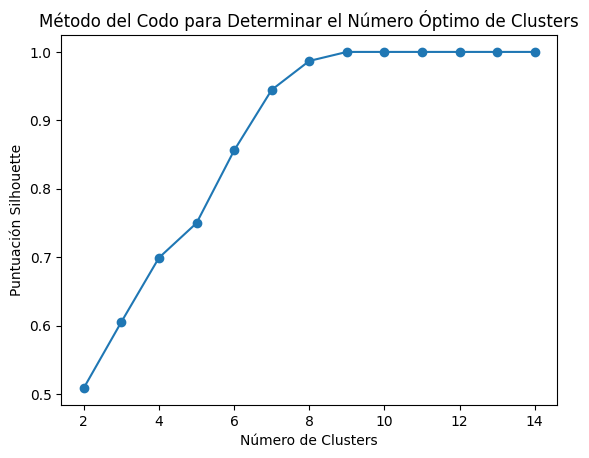

In [273]:
#Ahora, imprimimos la silueta
# Calcular la puntuación silhouette para un rango de clusters
silhouette_scores = []
range_n_clusters = range(2, 15)  # Probamos desde 2 hasta 10 clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

import matplotlib.pyplot as plt
# Mostrar gráfico
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación Silhouette')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.show()


#El que tenga mayor puntaje es la mejor cantidad de cluster, en el caso, como vemos en la imagen, es 3 (que tiene puntaje de 0.3700)

🤔🤓 Como podemos observar, **aunque nuestra putuación Silhouette era aceptable, plantear tres clusters no era lo más adecuado** pues, lo que nos recomienda el método del codo es seguir aumentando el número de clusters para aumentar la eficiencia de nuestra clasificación. Esto era algo esperable debido a la superposición de nuestros casos, algo que mencionamos líneas más arriba.

👉✅ Otra cosa que debemos rescatar del gráfico del método del codo es que **a partir de nueve clusters, la eficiencia llega a 1**. Es decir, nueve clusters es lo más eficiente. ¿Por qué ocurre esto? Porque en el punto de plantear nueve clusters, lo que modelo hace es cruzar cada una de las categorías de una variable, con cada una de las categorías de la otra variable: **al tener tres categorías es cada una, el resultado de esto es un "3 x 3"**.

👉❓ Por tal razón, llegado aquí, **debemos tomar una decisión**. Como no podemos aumentar a nueve el número de clusters pues perdería utilidad, tenemos que decidir si la actual clusterización en tres grupos es coherente y nos sirve. Veamos la siguiente imagen en la que cruzamos los valores de nuestras categorías y señalamos la clusterización que nos arrojó el modelo:

**IMAGEN 1: CRUCE DE VARIABLES SEGÚN CLUSTERIZACIÓN EN 3 GRUPOS**


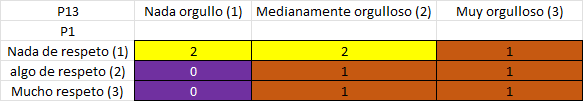

👉🤓 En la **IMAGEN 1** podemos observar en qué cluster quedó cada cruce de categorías según nuestro modelo de K-means. Un primer grupo (cluster 0) es aquel conformado por personas que tienen respeto por las instituciones, pero no están orgullos del sistema político peruano. Un segundo grupo (cluster 2) está compuestyo de personas que no sienten que las instituciones merezcan respeto y que, o no sienten orgullo por el sistema político, o solo sienten un nivel medio de orgullo. Y finalmente, el resto, en el que se clasificó a personas que sienten respeto (entre algo y mucho respeto) y además están orgullos (entre medianamente orgullosos y muy orgullosos); en este cluster también fue clasificado  el único perfil extraño: los que no sienten respeto, pero están orgullosos del sistema político.

🔍 En principio, **este modo de clusterización no es problemático salvo por lo correspondiente al perfil extraño. Veamos qué pasa si aumentamos a 4 el número de clusters**.

In [274]:
# Seleccionar características relevantes para el agrupamiento
features = ['P1', 'P13']


# Escalar las características para que tengan media 0 y varianza 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(jovenes[features])

# Aplicar K-Means con 4 grupos
kmeans = KMeans(n_clusters=4, random_state=100)
jovenes['Cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [275]:
# Visualizar los grupos encontrados
fig = px.scatter(jovenes, x='P1', y='P13', color='Cluster', title='FIGURA 2: Agrupamiento se Respeto por las instituciones y Orgullo por el sistema político peruano en jóvenes - 4 clusters')
fig.show()

**IMAGEN 2: CRUCE DE VARIABLES SEGÚN CLUSTERIZACIÓN EN 4 GRUPOS**

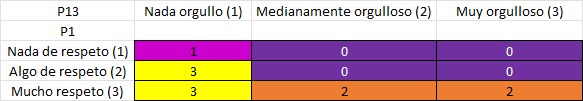

✅😎 Para el caso de cuatro clusters, un primer grupo (cluster 0) está conformado por personas que no siente o sienten algo de respeto, pero tienen por lo menos algo de orgullo por el sistema político; es decir, tienden a sentir que las instituciones no son dignas de respeto, pero eso no impide que no sienta por lo menos algo de orgullo por el sistema político. Luego está el cluster 1 que está conformado por personas que sienten que las instituciones no son dignas de respeto y que no sienten orgullo por el sistema político. Por otro lado, el cluster 2 está conformado por personas que sienten mucho respeto por las instituciones y tienen tendencia a sentir orgullo por el sistema político (llegando a sentir mucho orgullo en algunos casos). Y finalmente, el cluster 3, integrado por personas que tienen tendencia a sentir respeto (llegando a sentir mucho respeto), pero lamentablemente no están orgullosos del sistema político.

✅😎 Tras haber hecho esta interpretación, **podemos decir que este modelo de cuatro clusters es mucho más viable que el de tres y más acotado**; además de guardar coherencia. Veamos la puntuación de la silueta que nos arroja:

In [276]:
# Calcular la puntuación silhouette
puntuacion_silhouette = silhouette_score(scaled_data, kmeans.labels_)
# Mostrar la puntuación silhouette
print("Puntuación Silhouette:", puntuacion_silhouette)
# Tabla de grupos encontrados
tabla_grupos = jovenes.groupby('Cluster')[['P1','P13']].mean()
print(tabla_grupos)

Puntuación Silhouette: 0.6991364278120089
               P1       P13
Cluster                    
0        1.772414  2.131034
1        1.000000  1.000000
2        3.000000  2.419355
3        2.280303  1.000000


Es una **puntuación aceptable de 0.69**. Calculemos el porcentaje de personas que será ubicada en cada cluster de acuerdo con nuestro modelo.

In [278]:
#Ahora diseñamos un segundo gráfico en el que podamos ver la distrución de género por edades. Para ello, debemos seguir varios pasos

#Primero, agrupamos el dataset por edades y género y contamos las unidades por cada grupo
conteo_cluster = jovenes.groupby(['Cluster']).size().reset_index(name='Conteo')
porcentaje_cluster = conteo_cluster.Conteo * 100/484
porcentaje_cluster = porcentaje_cluster.round(2)
conteo_cluster['Porcentaje'] = porcentaje_cluster
conteo_cluster['Porcentaje'] = conteo_cluster['Porcentaje'].apply(lambda x: '{:.2f}%'.format(x))

# Renombrar los valores de los clusters
conteo_cluster['Cluster'] = conteo_cluster['Cluster'].replace({0: 'Tienden a no sentir respeto por las inst., pero están orgullosos del sist. pol.',
                                                              1: 'No sienten respeto por las inst. ni orgullo por el sist. pol.',
                                                              2: 'Sienten respeto por las inst. y orgullo por el sist. pol.',
                                                              3: 'Sienten respeto por las inst., pero no están orgullosos del sist. pol.'})

# Gráfico de barras con valores de porcentaje
fig = px.bar(conteo_cluster, x='Cluster', y='Conteo', text='Porcentaje',
             title='FIGURA 3: Distribución de clusters',
             labels={'Cluster': 'Cluster', 'Conteo': 'Número de personas'},
             color_discrete_sequence=px.colors.qualitative.Pastel1)

# Actualizar el diseño para mostrar los valores de porcentaje encima de las barras
fig.update_traces(textposition='outside', texttemplate='%{text}')

# Añadir colores diferentes a las barras
fig.update_traces(marker_color=['#7030A0', '#CC00CC', '#ED7D31', '#FFD966'])

# Mostrar el gráfico
fig.show()

🗣️✅ Para diseñar este gráfico, aprovechamos para renombrar los clusters por una pequeña descripción de las personas que conforman el cluster. Como podemos observar en la **FIGURA 3**, los jóvenes del cluster 0 (Tienden a no sentir respeto por las instituciones, pero están orgullosos del sistema político) son la mayoría, alcanzando un 29.96%. Les siguen los jóvenes del cluster 3 (Sienten respeto por las instituciones, pero no están orgullosos del sistema político) con un 27.27%. Luego están los jóvenes del cluster 1 (No sienten respeto por las instituciones ni orgullo por el sistema político) con un 23.55%; estos son los jóvenes más desencantados con ambas variables. Y finalmente, están los jóvenes del cluster 2 (Sienten respeto por las instituciones y orgullo por el sistema político) con un 19.21%. Estos últimos son los que evalúan bien tanto a las instituciones como al sistema político peruano y, como podemos observar, aunque son el grupo más pequeño, tienen un tamaño destacable teniendo en cuenta las variables analizadas antes.

# Conclusiones

Decidimos hacer un análisis más profundo del grupo etario de 18 a 29 años (jóvenes) pues es un grupo considerable dentro de la población peruana y, al constituirse como los principales actores civiles del mañana, es importante tener en cuenta las opiniones que tengan en el presente.

En la primera parte de este notebook hicimos una breve descripción de la muestra en general, y luego hicimos una más específica para los jóvenes peruanos. En una segunda parte contrastamos nuestras hipótesis y logramos corroboralas. Posteriormente hicimos una descripción de lo que respondieron los jóvenes en algunas preguntas de nuestro interés y que habíamos seleccionado al principio.

Finalmente, utilizamos el machine learning para clasificar a los jóvenes peruanos y ahorrarnos el tiempo de pensar una clasificación teniendo en cuenta dos variables: P13 (orgullo por el sistema político) y P9 (respeto por las instituciones políticas). Gracias a ello, pudimos plantear un tipología de jóvenes de acuerdo con el cruce de esas dos variables:
* Quienes tienden a no sentir respeto por las instituciones, pero están orgullosos del sistema político
* Quienes no sienten respeto por las instituciones ni orgullo por el sistema político
* Quienes sienten respeto por las instituciones y orgullo por el sistema político
* Quienes sienten respeto por las instituciones, pero no están orgullosos del sistema político

Esta tipología es meramente teórica e ilustrativa, y nos ayuda a pensar un modo en el que los jóvenes peruanos del 2023 pueden ser clasificados según dichas variables.